<div class="alert alert-block alert-danger">  
    <h1><strong>👨‍💻 Getting Started with Image/fruits Recognition 👍</strong></h1>
    <i></i>
</div>

# <img src="https://i.ytimg.com/vi/AArJbDKEaQM/maxresdefault.jpg">

<div class="alert alert-block alert-info">  
<h1><strong>Introduction</strong></h1>
    <p>Computer vision methods and strategies can help to recognize the fruits with some basic
features like the color of fruits, intensity of fruits ,shape of fruits and texture of the
fruits. The term "recognize" is to predict the name of the fruit. In this project, we are going to use 81 different fruits claases. We will train the model using tensorflow. </p>
    <br>
        <hr>
      <b>Problem description: </b> 
    <hr>
<ul>
    <li>To build a robust system to recognize the fruits according to the color of fruits, intensity of fruits ,shape of fruits and texture of the
fruits.</li>
</ul>


<hr>
<b>Evolution measures: </b> 
<hr>
<ul>
<p> After training the model, we will apply the evaluation measures to check that how the model is getting predictions. We will use the following evaluation measures to evaluate the performance of the model:</p>
    <li>Accuracy</li>
    <li>Plots of training and validation scores</li>
</ul>
<hr>
<b>Technical Approach</b>
<hr>
<p>We are using python language in the implementations and Jupyter Notebook that support the machine learning and data science projects. We will build tensorflow based model. We will use Fruits360 dataset. The dataset providers provide the training and test data separately. After training on the model, we will evaluate the model to check the performance of trained model.</p>
 
<hr>
<b>Source of Data: </b> 
<hr> 
 <a href="https://data.mendeley.com/datasets/rp73yg93n8/1">https://data.mendeley.com/datasets/rp73yg93n8/1</a>
   
</div>

<div class="alert alert-block alert-danger">  
<h2><center><strong>Importing Python Libraries 📕 📗 📘 📙</strong></center></h2>
        
</div>

- Libraries are important and we call them to perform the different actions on our data and for training the models.
- Its a first step to load the library to perform the specific task

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D
from tensorflow.keras.layers import Activation, Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img
from sklearn.datasets import load_files
import matplotlib.image as mpimg
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from keras.utils import np_utils

<h4> We are uisng the following versions of the libraries:</h4>

- numpy == 1.18.5 

- tensorflow ==1.7.0

- keras == 2.4.3

- matplotlib ==3.3.2


<h4>How we can install the libraries in python?</h4>

<h4>To install the python library is very easy</h4>
- pip install name_of_library 
<h5> Like if you wanted to install tensorflow? </h5>
- pip install tensforflow

<div class="alert alert-block alert-danger">  
<h2><center><strong>Exploratory data analysis 🔎 📊</strong></center></h2>
        
</div>

- Exploration of data is not neccessory for training the model but its a good practice to look at the dataset so that we can analyse that what type of data we are using and how we can handle it.

# Sample images

(100, 100, 3)


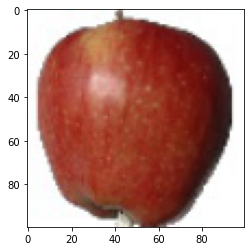

In [9]:
img = mpimg.imread('../input/fruits/fruits-360/Training/Apple Red 1/101_100.jpg')
print(img.shape)
plt.imshow(img)

(100, 100, 3)


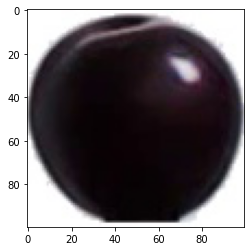

In [10]:
img = mpimg.imread('../input/fruits/fruits-360/Training/Cherry Wax Black/101_100.jpg')
print(img.shape)
plt.imshow(img)

<b> <h3> Labels : </h3></b>  Labels are the targets like in this project names of the fruits are labels. 

<b> <h3> Inputs : </h3></b>  Inputs are the data that we feed into machine learning like in this project images are the inputs. 

<b> <h3> Training Data </h3></b>  We use training data when we train the models. We feed train data to machine learning and deep learning models so that model can learn from the data.

<b> <h3> Validation Data </h3></b>  We use validation data while training the model. We use this data to evalaute the performance that how the model perform on training time.

<b> <h3> Testing Data </h3></b>  We use testing data after training the model. We use this data to evalaute the performance that how the model perform after training. So in this way first we get predictions from the trained model without giving the labels and then we compare the true labels with predictions and get the performance of th model..

# Training and Testing data Information

In [11]:
import os, os.path
train_categories = []
train_samples = []
for i in os.listdir("../input/fruits/fruits-360/Training/"):
    train_categories.append(i)
    train_samples.append(len(os.listdir("../input/fruits/fruits-360/Training/"+ i)))

test_categories = []
test_samples = []
for i in os.listdir("../input/fruits/fruits-360/Test/"):
    test_categories.append(i)
    test_samples.append(len(os.listdir("../input/fruits/fruits-360/Test/"+ i)))

    
print("Count of Fruits in Training set:", sum(train_samples))
print("Count of Fruits in Set set:", sum(test_samples))

Count of Fruits in Training set: 67692
Count of Fruits in Set set: 22688


# Distrubution of Fruits with counts in Training Set

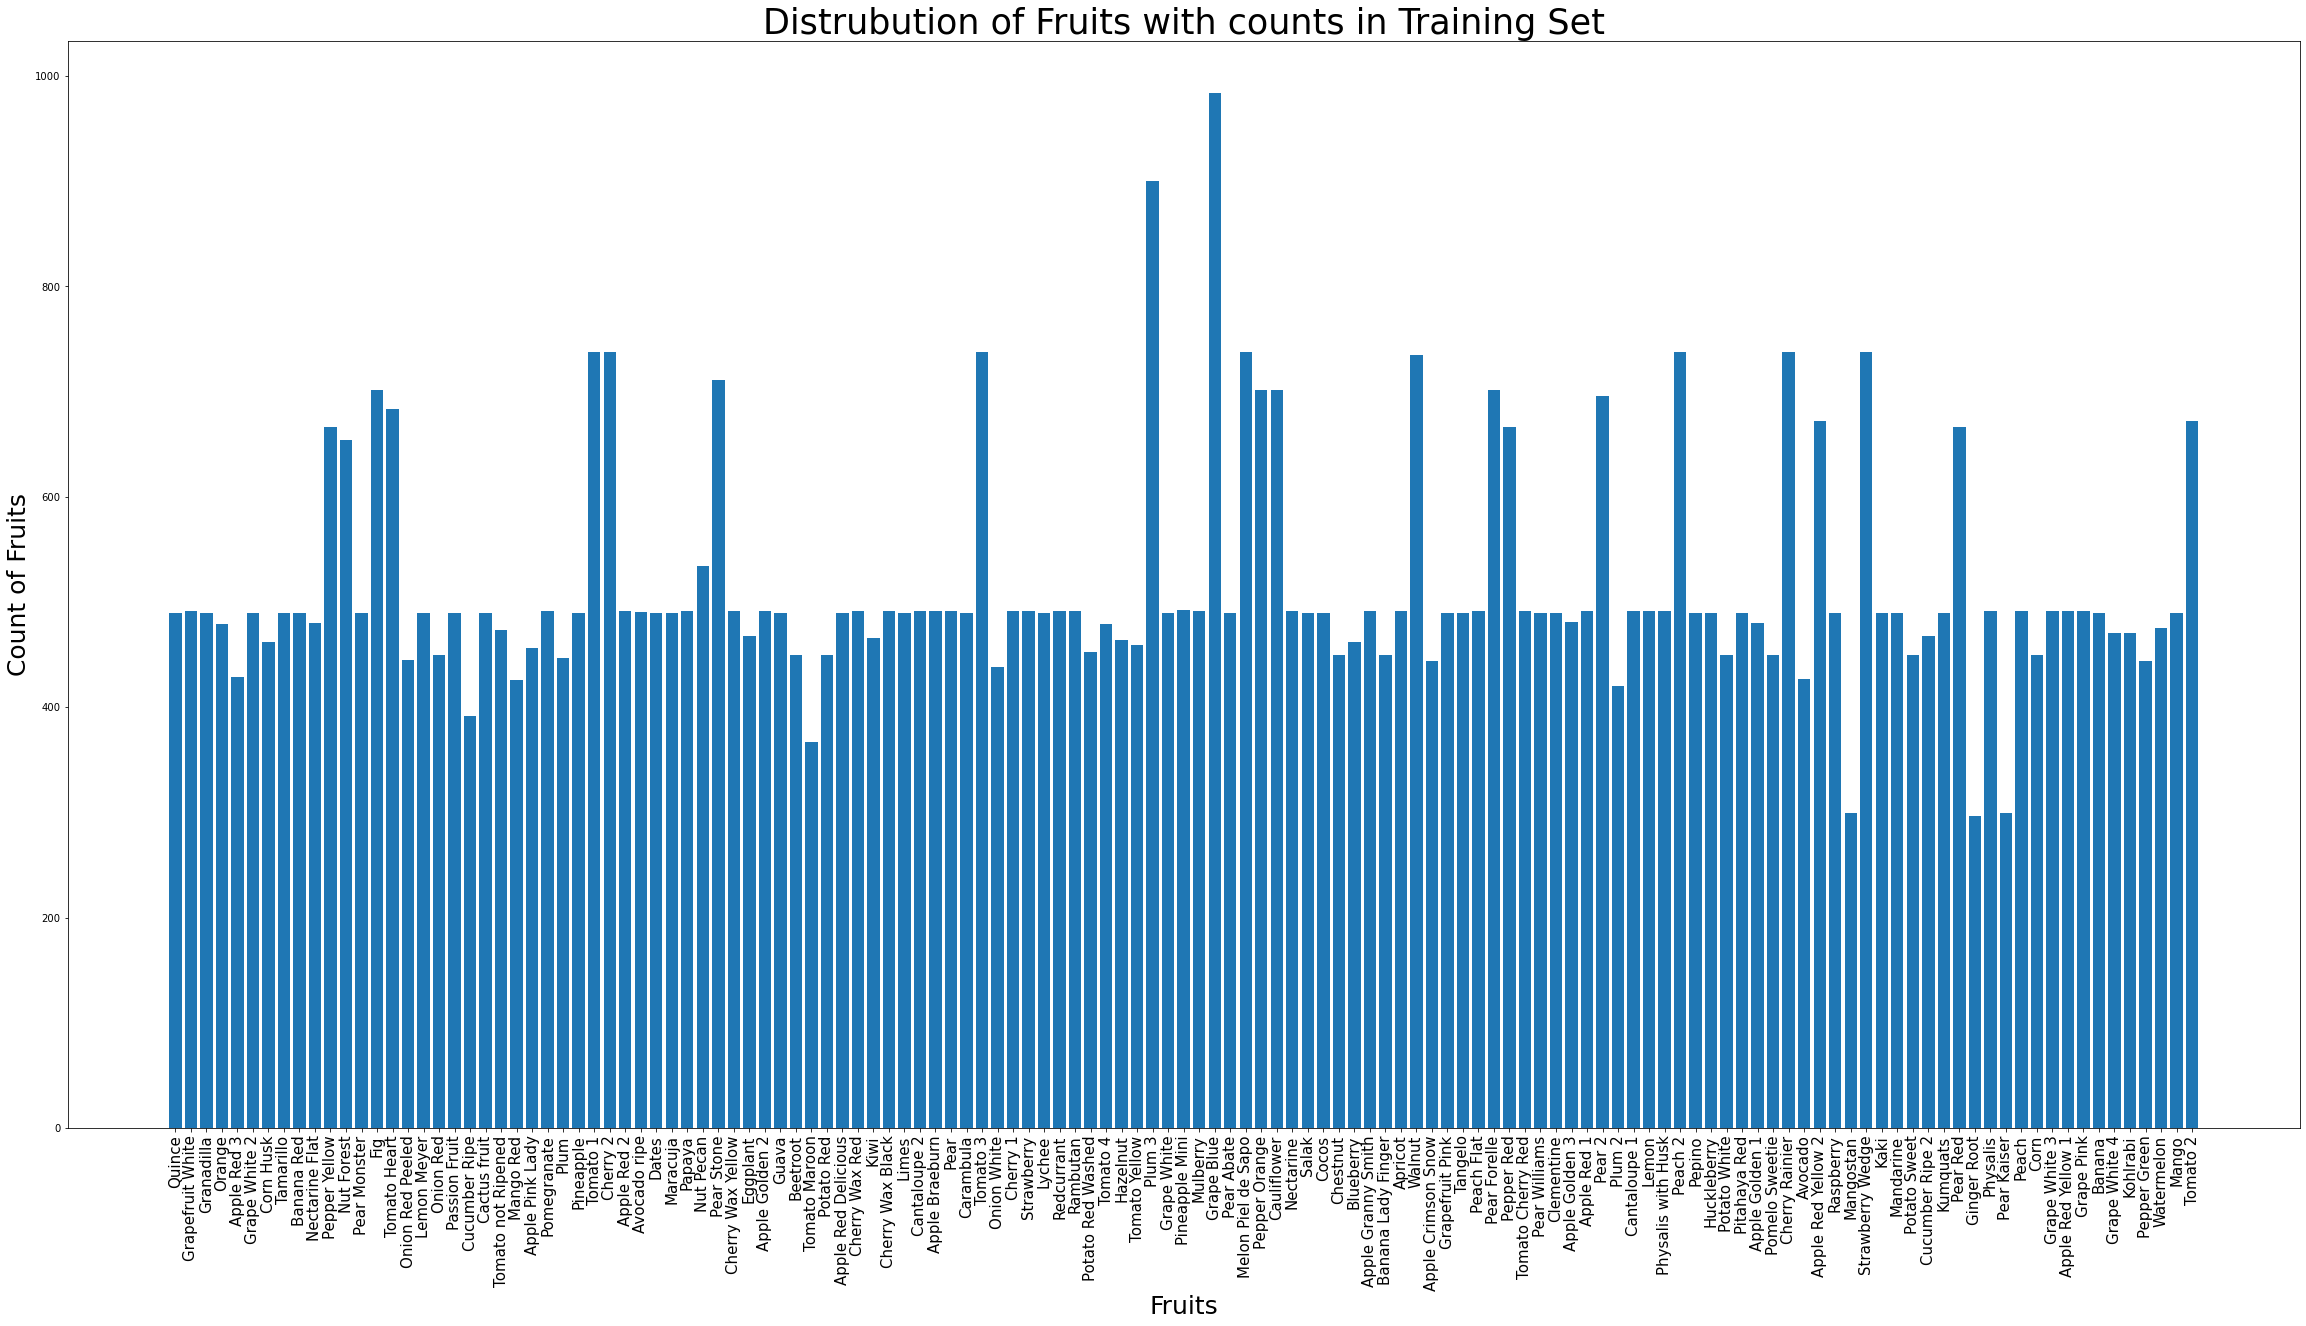

In [12]:
figure_size = plt.rcParams["figure.figsize"]
figure_size[0] = 40
figure_size[1] = 20
plt.rcParams["figure.figsize"] = figure_size
index = np.arange(len(train_categories))
plt.bar(index, train_samples)
plt.xlabel('Fruits', fontsize=25)
plt.ylabel('Count of Fruits', fontsize=25)
plt.xticks(index, train_categories, fontsize=15, rotation=90)
plt.title('Distrubution of Fruits with counts in Training Set', fontsize=35)
plt.show()

# Distrubution of Fruits with counts in Test Set

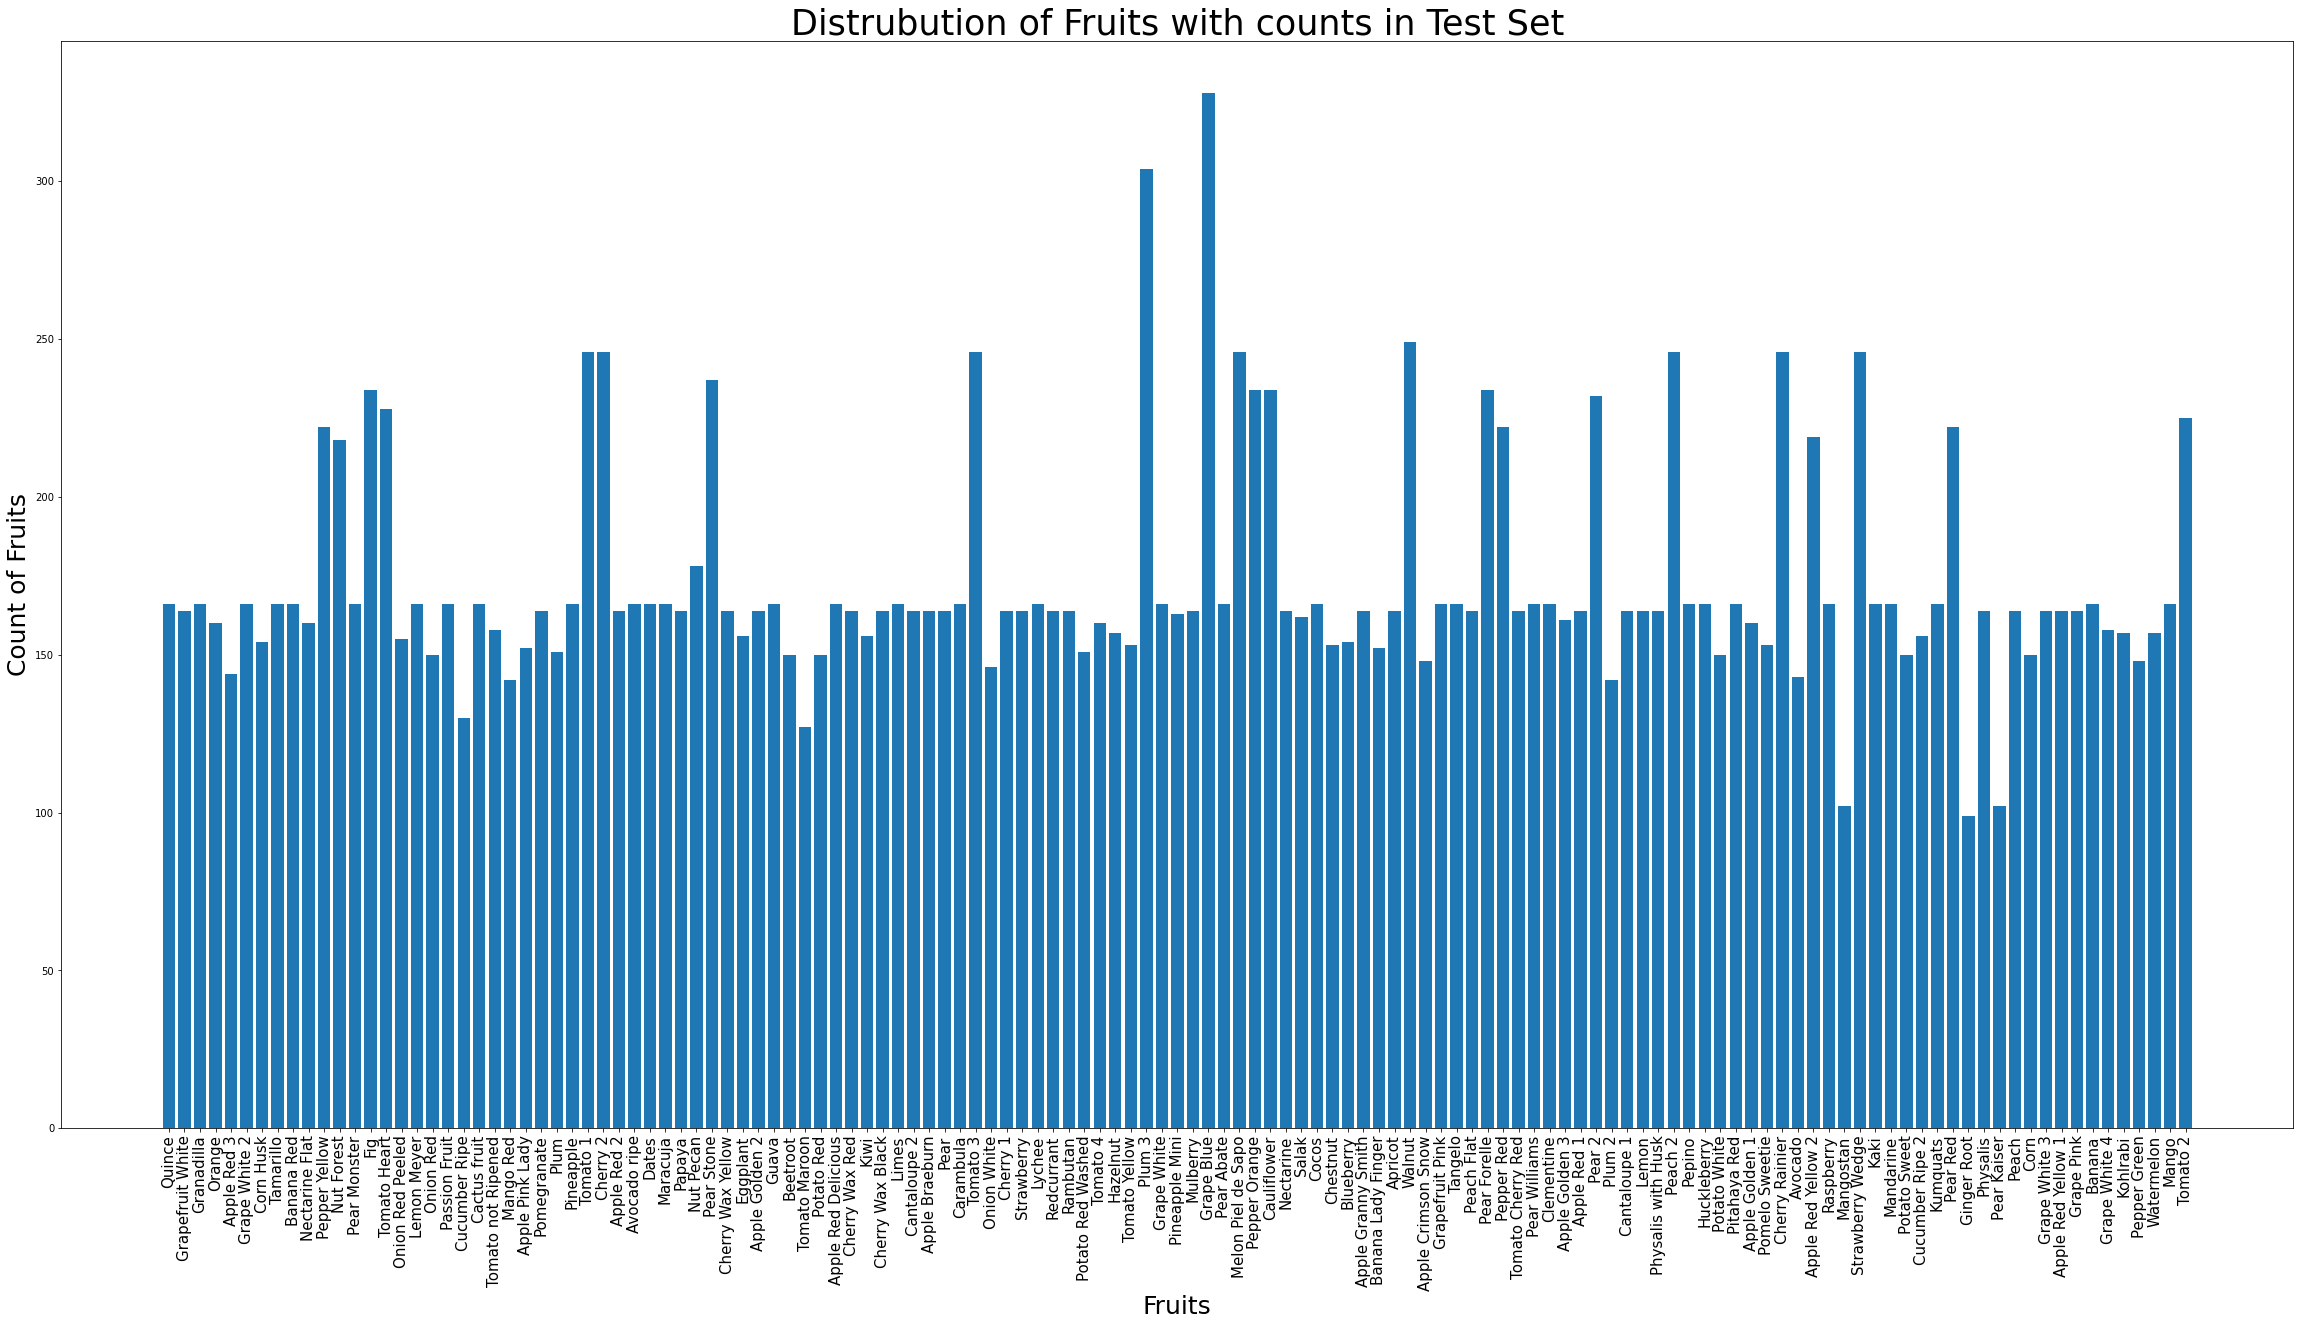

In [13]:
index2 = np.arange(len(test_categories))
plt.bar(index2, test_samples)
plt.xlabel('Fruits', fontsize=25)
plt.ylabel('Count of Fruits', fontsize=25)
plt.xticks(index2, test_categories, fontsize=15, rotation=90)
plt.title('Distrubution of Fruits with counts in Test Set', fontsize=35)
plt.show()

<div class="alert alert-block alert-danger">  
<h2><center><strong>Loading the data 📁 📂 and Spliting the dataset into training and testing with label names</strong></center></h2>
        
</div>

- We are loading all training and testing data 
- Saving inputs/images in x_train of training data and saving labels in y_train
- Saving inputs/images in x_test of testing data and saving labels in y_test

In [15]:
train_dir = '../input/fruits/fruits-360/Training/'
test_dir = '../input/fruits/fruits-360/Test/'

def load_dataset(data_path):
    data_loading = load_files(data_path)
    files_add = np.array(data_loading['filenames'])
    targets_fruits = np.array(data_loading['target'])
    target_labels_fruits = np.array(data_loading['target_names'])
    return files_add,targets_fruits,target_labels_fruits
    
x_train, y_train,target_labels = load_dataset(train_dir)
x_test, y_test,_ = load_dataset(test_dir)

# Classes of fruits

- 81 are labels/classes which are the names of fruits because we are using fruits of 81 types.

In [12]:
no_of_classes = len(np.unique(y_train))
no_of_classes

81

# Vector of the ytrain first record

- As we know that we are using 81 classes/labels, so we created a vector of 81 values. 
- We can see that there is only 1 and all are zero's that is showing a label of first image.

In [13]:
y_train = np_utils.to_categorical(y_train,no_of_classes)
y_test = np_utils.to_categorical(y_test,no_of_classes)
y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

# Now, we have to divide the validation set into test and validation set

- We are splitting the test data into validation data. Validation data will be used while training the model to check the performance during training and test data will be used after training the model.

In [14]:
x_test,x_valid = x_test[7000:],x_test[:7000]
y_test,y_vaild = y_test[7000:],y_test[:7000]
print('Vaildation X : ',x_valid.shape)
print('Vaildation y :',y_vaild.shape)
print('Test X : ',x_test.shape)
print('Test y : ',y_test.shape)

Vaildation X :  (7000,)
Vaildation y : (7000, 81)
Test X :  (6877,)
Test y :  (6877, 81)


<div class="alert alert-block alert-danger">  
<h2><center><strong>Data Preprocessing</strong></center></h2>
        
</div>

- <h3> Till now the data is just images. We need to convert them into arrays form for the training and testing because machine learning model only undertsand the numeric data so we have to convert the images into arrays form. </h3>

In [15]:
def convert_image_to_array_form(files):
    images_array=[]
    for file in files:
        images_array.append(img_to_array(load_img(file)))
    return images_array

x_train = np.array(convert_image_to_array_form(x_train))
print('Training set shape : ',x_train.shape)

x_valid = np.array(convert_image_to_array_form(x_valid))
print('Validation set shape : ',x_valid.shape)

x_test = np.array(convert_image_to_array_form(x_test))
print('Test set shape : ',x_test.shape)

print('1st training image shape ',x_train[0].shape)


Training set shape :  (41322, 100, 100, 3)
Validation set shape :  (7000, 100, 100, 3)
Test set shape :  (6877, 100, 100, 3)
1st training image shape  (100, 100, 3)


# Features scalling from 0-255 to 0-1

- <h5> After converting the images into arrays form, the features/pixels ranges are from 0 to 255. We are scalling the features/pixels from 0-255 to 0-1 range.</h5>
- <h5> Why we are doing this?</h5>
- <h5> By doing this, we can reduce the training time. Because we can also feed the same features but when the model will train so it take more time by calculating the values from 0-255 than 0-1. That is why we are scalling the features.</h5>

In [17]:
x_train = x_train.astype('float32')/255
x_valid = x_valid.astype('float32')/255
x_test = x_test.astype('float32')/255

<div class="alert alert-block alert-danger">  
<h2><center><strong>Implementing Tensorflow based model for training 🧪</strong></center></h2>   
</div>

<h4> Step 1</h4>
- We are calling base Sequancial model for training and for further tuning of parameters on image data. We must call it when we work on the keras, tensorflow based libraries.

<h4> Step 2</h4>
- Conv2D is 2D convolutional layer(where filters are applied to original image with specific features map to reduce the number of features), Conv2D layer create the convolution kernel(fixed size of boxes to apply on the image like below in the example gif) that take input of 16 filters which help to produce a tensor of outputs. We are giving input of the image with size of 100 width and 100 height and 3 is the channel for RGB.
<img src="https://miro.medium.com/max/1320/1*DTTpGlhwkctlv9CYannVsw.gif">


<h4> Step 3</h4>
- Activation function is node that is put at the end of all layers of neural network model or in between neural network layers. Activation function help to decide which neuron should be pass and which neuron should fire. So activation function of node defines the output of that node given an input or set of inputs. 
<img src="https://missinglink.ai/wp-content/uploads/2018/11/activationfunction-1.png">

<h4> Step 4</h4>
- Maxpooling is a pooling operation that calculates maximum value in each patch of each feature map. It takes the value from input vectors and prepare the vector for the next layers.
<img src="https://developers.google.com/machine-learning/practica/image-classification/images/maxpool_animation.gif">

<h4> Step 5</h4>
- Droupout layer drop some neurons from previous layers. why we apply this? We apply this to avoid the overfitting problems. In overfitting, model give good accuracy on training time but not good on testing time.
<img src="https://drek4537l1klr.cloudfront.net/elgendy/v-3/Figures/Img_01-04A_171.gif">

<h4> Step 6</h4>
- Flatten layer convert the 2D array into 1D array of all features.
<img src="https://sds-platform-private.s3-us-east-2.amazonaws.com/uploads/73_blog_image_1.png">

<h4> Step 7</h4>
- Dense layer reduce the outputs by getting inputs from Faltten layer. Dense layer use all the inputs of previous layer neurons and perform calculations and send 150 outputs


In [13]:
def tensorflow_based_model():
    model = Sequential() #step 1
    model.add(Conv2D(filters = 16, kernel_size = 2,input_shape=(100,100,3),padding='same')) #step2
    model.add(Activation('relu'))  # step3
    model.add(MaxPooling2D(pool_size=2)) #step4
    model.add(Conv2D(filters = 32,kernel_size = 2,activation= 'relu',padding='same')) #repeating step 2 and step3 but with more filters of 32
    model.add(MaxPooling2D(pool_size=2)) #repeating step 4 again
    model.add(Conv2D(filters = 64,kernel_size = 2,activation= 'relu',padding='same')) #repeating step 2 and step3 but with more filters of 64
    model.add(MaxPooling2D(pool_size=2)) #repeating step 4 again
    model.add(Conv2D(filters = 128,kernel_size = 2,activation= 'relu',padding='same')) #repeating step 2 and step3 but with more filters of 64
    model.add(MaxPooling2D(pool_size=2)) #repeating step 4 again
    model.add(Dropout(0.3)) # step5
    model.add(Flatten()) #step 6
    model.add(Dense(150)) #step 7
    model.add(Activation('relu')) # setp 3
    model.add(Dropout(0.4)) # step 5
    model.add(Dense(81,activation = 'softmax')) # setp3 and step7. but this time, we are using activation function as softmax (if we train on two classes then we set sigmoid)
    return model #function returning the value when we call it

# Model compilation

- First we are calling the model
- We are using 81 classes so we set loss as "categorical_crossentropy". We use loss as "binary_crossentropy" for two classes. 
- Optimizer is a function that used to change the features of neural network such as learning rate (how the model learn with features) in order to reduce the losses. So the learning rate of neural network to reduce the losses is defined by optimizer. 
- We are setting metrics=accuracy because we are going to caluclate the percentage of correct predictions over all predictions on the validation set

In [14]:
model = tensorflow_based_model() # here we are calling the function of created model
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']) 

# Training the model with parameter tuning
- We are feeding the training data and validation data to start training of model.
* We set the following parameters:
- Batch size =32 so the model take 80 images in each iteration and train them. Batch size is a term used in machine learning and refers to the number of training examples utilized in one iteration. 
- Epochs =30 so the model will train on the data 30 times.Epoch is a term used in machine learning and indicates the number of passes of the entire training dataset the machine learning algorithm has completed.
- We can choose batch_size, and epochs as we want so the good practice is to set some values and train the model if the model will not give the good results we can change it and then try again for the training of the model. We can repeat this process many time untill we will not get the good results and this process called as parameter tuning.

In [15]:
history = model.fit(x_train,y_train,
        batch_size = 32,
        epochs=30,
        validation_data=(x_valid, y_vaild),
        verbose=2, shuffle=True)

Instructions for updating:
Use tf.cast instead.
Train on 41322 samples, validate on 7000 samples
Epoch 1/30
 - 533s - loss: 1.3395 - acc: 0.6205 - val_loss: 0.3280 - val_acc: 0.8994

Epoch 00001: val_loss improved from inf to 0.32804, saving model to cnn_from_scratch_fruits.hdf5
Epoch 2/30
 - 443s - loss: 0.2564 - acc: 0.9130 - val_loss: 0.1623 - val_acc: 0.9446

Epoch 00002: val_loss improved from 0.32804 to 0.16229, saving model to cnn_from_scratch_fruits.hdf5
Epoch 3/30
 - 402s - loss: 0.1590 - acc: 0.9472 - val_loss: 0.0849 - val_acc: 0.9776

Epoch 00003: val_loss improved from 0.16229 to 0.08487, saving model to cnn_from_scratch_fruits.hdf5
Epoch 4/30
 - 423s - loss: 0.1314 - acc: 0.9575 - val_loss: 0.1032 - val_acc: 0.9661

Epoch 00004: val_loss did not improve from 0.08487
Epoch 5/30
 - 409s - loss: 0.1156 - acc: 0.9636 - val_loss: 0.0924 - val_acc: 0.9756

Epoch 00005: val_loss did not improve from 0.08487
Epoch 6/30
 - 424s - loss: 0.1141 - acc: 0.9650 - val_loss: 0.1059 - val

<h1> We need to do all the above configurations to train the model. If we will not set all settings correctly then we could not get the desired results.</h1>

# Accuracy score on the test data

- Accuracy is the number of correctly recognized images from all the images. 
- For example, if the trained model recognize the 90 images correct and 10 images wrong from total of 100 images then the accuracy score will be 90%. 
- Accuracy= Total number of correct predictions/Total number of predictions

In [18]:
acc_score = model.evaluate(x_test, y_test) #we are starting to test the model here
print('\n', 'Test accuracy:', acc_score[1])


 Test accuracy: 0.9853133634805368


# Visualization with prediction 
- We are using the trained model and getting predictions on the test data
- Outside the bracket are the predictions names of the fruits
- Inside the bracket are the true label names of the fruits

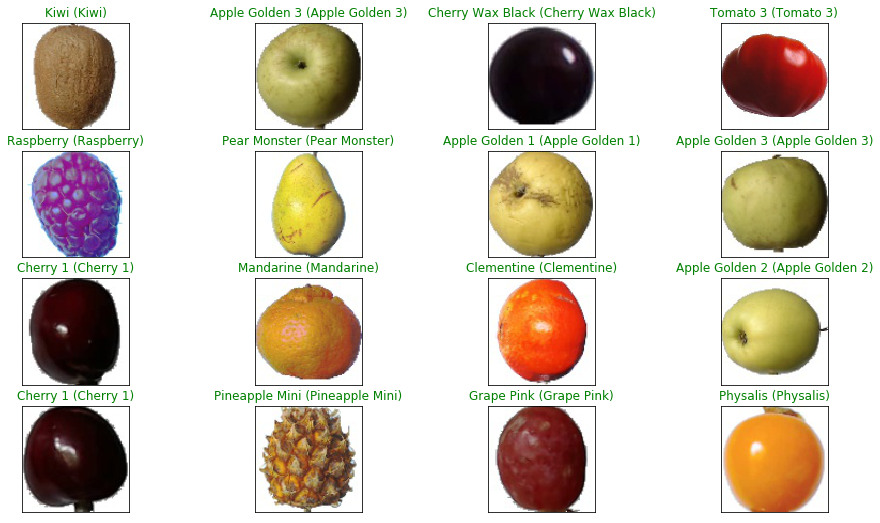

In [54]:
predictions = model.predict(x_test)
fig = plt.figure(figsize=(16, 9))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=16, replace=False)):
    ax = fig.add_subplot(4, 4, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(predictions[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(target_labels[pred_idx], target_labels[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))

# Visualization the loss and accuracy with respect to epochs
- We are looking at the history of the model of each epoch as we trained our model on 30 epochs.
- Blue line shows the training accuarcy and also the training loss.
- Orange line shows the Testing accuarcy and also the testing loss.
- Accuracy and loss on the train and test data start from zero and finally close to 1 (100%).

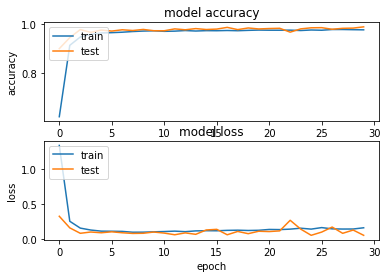

In [55]:
plt.figure(1)  
plt.subplot(211)  
plt.plot(history.history['acc'])  
plt.plot(history.history['val_acc'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
plt.subplot(212)  
plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
plt.show()

<div class="alert alert-block alert-success">  
<h1><center><strong>Conclusion 📝</strong></center></h1>
    <p>
<li>We used the fruits360 dataset and explored the data with different ways.</li>
        <li>We prepared the the images data and extract the features.</li>
          <li>We trained model based on tensorflow with all settings. </li>
        <li>We evaluated thye model with accuracy and look at the performance of the model with plots.</li>
         <li>If you are interested to work on any image based project, prepare the data as we prepared in this project and there could be some changes in the code like number of classes or loss function.</li>
            <li>We worked on the classification problem and sepcifically we call it multi class classification because we are using in total 81 classes of fruits.</li>
        </p>
</div>

<div class="alert alert-block alert-info">  
    <p>
<h1>I hope you like my efforts for Kaggle Community. Thanks 😍</h1>
        </p>
</div>